# Generate data report plots

This notebook reproduces the figures in the Solid Earth paper which show example training data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../shared_modules/')
import plot_utils

In [2]:
# Global constants
DT = 0.002
T_GAIN = 2.5
DX,DZ = 5., 5.
NX,NZ = 128, 128
NSTEPS = 512

VLIM = 0.6
CLIM = (1500,3600)

## Example FD plots - Wavenet

In [3]:
VEL_RUN = "layers_validate"
SIM_RUN = "layers_2ms_validate"
DELTARECi = 10
isim=(600,0)
VEL_DIR =  "velocity/" + VEL_RUN + "/"
OUT_SIM_DIR = "gather/" + SIM_RUN + "/"
wavefields = np.load(OUT_SIM_DIR + "wavefields_%.8i_%.8i.npy"%(isim[0],isim[1]))
wavefields = wavefields[::4]
gather = np.load(OUT_SIM_DIR + "gather_%.8i_%.8i.npy"%(isim[0],isim[1]))
velocity = np.load(VEL_DIR + "velocity_%.8i.npy"%(isim[0]))
reflectivity = np.load(VEL_DIR + "reflectivity_%.8i.npy"%(isim[0]))
source_is = np.load(OUT_SIM_DIR + "source_is.npy")
receiver_is = np.load(OUT_SIM_DIR + "receiver_is.npy")
source_i = source_is[isim[0],isim[1]]
NREC = len(receiver_is)

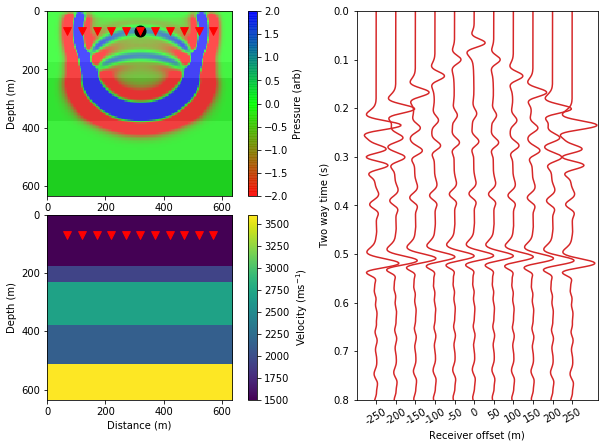

In [4]:
gain = np.arange(NSTEPS)**T_GAIN
gain = gain / np.median(gain)

plt.figure(figsize=(11,6))

# velocity & wavefield
plt.subplot2grid((2, 2), (0, 0), colspan=1)
plt.imshow(velocity.T, alpha=0.6, cmap="gray_r", vmin=CLIM[0], vmax=CLIM[1])
plt.imshow(wavefields[105].T, aspect=1, cmap=plot_utils.rgb, alpha=0.7, vmin = -2, vmax=2)
cb = plt.colorbar()
cb.ax.set_ylabel('Pressure (arb)')
plt.scatter(source_i[0], source_i[1], color='black', s=120)
plt.scatter(receiver_is[:,0], receiver_is[:,1], color='red', marker='v', s=60)
plt.gca().set_anchor('C')# centre plot
plt.yticks(np.arange(0,NZ,40)[::-1], (DZ*np.arange(0,NZ,40)[::-1]).astype(np.int))
plt.xticks(np.arange(0,NX,40), (DX*np.arange(0,NX,40)).astype(np.int))
plt.ylabel("Depth (m)")
plt.xlim(0, NX-1)
plt.ylim(NZ-1, 0)

# velocity
plt.subplot2grid((2, 2), (1, 0), colspan=1)
plt.imshow(velocity.T, vmin=CLIM[0], vmax=CLIM[1])
cb = plt.colorbar()
cb.ax.set_ylabel('Velocity ($\mathrm{ms}^{-1}$)')
plt.scatter(receiver_is[:,0], receiver_is[:,1], color='red', marker='v', s=60)
plt.gca().set_anchor('C')# centre plot
plt.yticks(np.arange(0,NZ,40)[::-1], (DZ*np.arange(0,NZ,40)[::-1]).astype(np.int))
plt.xticks(np.arange(0,NX,40), (DX*np.arange(0,NX,40)).astype(np.int))
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")
plt.xlim(0, NX-1)
plt.ylim(NZ-1, 0)

# gather
lim = 1.
plt.subplot2grid((2, 2), (0, 1), rowspan=2)
for ir in range(NREC): plt.plot(lim*ir+gain*gather[ir,:], DT*np.arange(NSTEPS), color='tab:red')
plt.gca().invert_yaxis()
plt.xlabel("Receiver offset (m)")
plt.xticks(np.arange(0,NREC*lim,lim), [int(-(NREC-1)*DELTARECi*DX/2 + irec*DELTARECi*DX) for irec in range(NREC)])
plt.ylabel("Two way time (s)")
plt.ylim(DT*400,0)
plt.xlim(-lim, lim*(NREC-1)+lim+0.3)
plt.gca().set_anchor('C')# centre plot
plt.xticks(rotation=30)

plt.subplots_adjust(left=0.2, right=0.9, bottom=0.1, top=1., hspace=0.1, wspace=0.3)
plt.savefig("../report_plots/fig01.pdf", bbox_inches='tight', pad_inches=0.01, dpi=300)

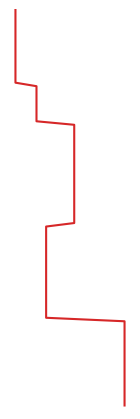

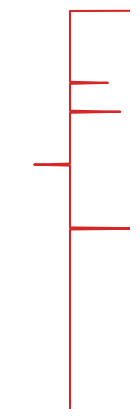

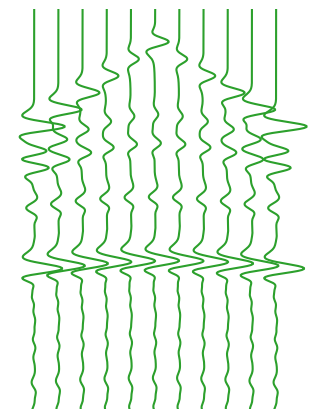

In [5]:
v = velocity[0,source_i[1]:]
r = reflectivity[0]

fig = plt.figure(frameon=False, figsize=(1.2,4), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.plot(v, np.arange(NZ-source_i[1]), color='tab:red')
ax.invert_yaxis()
plt.ylim(NZ-source_i[1],0)
with open('../report_plots/raw/velocity_trace.png', 'wb') as outfile:
    fig.canvas.print_png(outfile)

fig = plt.figure(frameon=False, figsize=(1.2,4), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.plot(r, np.arange(NSTEPS), color='tab:red')
ax.invert_yaxis()
plt.ylim(400, -1)
plt.xlim(-0.2, 0.2)
with open('../report_plots/raw/r_t.png', 'wb') as outfile:
    fig.canvas.print_png(outfile)

lim = 1.
fig = plt.figure(frameon=False, figsize=(3,4), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
for ir in range(NREC): ax.plot(lim*ir+gain*gather[ir,:], np.arange(NSTEPS), color='tab:green')
ax.invert_yaxis()
plt.ylim(400,0)
plt.xlim(-lim, lim*(NREC-1)+lim+0.4)
with open('../report_plots/raw/gather_wavenet.png', 'wb') as outfile:
    fig.canvas.print_png(outfile)
    
plt.show()

## Example FD plots - Autoencoder

In [6]:
VEL_RUN = "fault_validate"
SIM_RUN = "fault_2ms_r_validate"
DELTARECi = 3
isim=(0,2)
VEL_DIR =  "velocity/" + VEL_RUN + "/"
OUT_SIM_DIR = "gather/" + SIM_RUN + "/"
wavefields = np.load(OUT_SIM_DIR + "wavefields_%.8i_%.8i.npy"%(isim[0],isim[1]))
wavefields = wavefields[::4]
gather = np.load(OUT_SIM_DIR + "gather_%.8i_%.8i.npy"%(isim[0],isim[1]))
velocity = np.load(VEL_DIR + "velocity_%.8i.npy"%(isim[0]))
source_is = np.load(OUT_SIM_DIR + "source_is.npy")
receiver_is = np.load(OUT_SIM_DIR + "receiver_is.npy")
source_i = source_is[isim[0],isim[1]]
NREC = len(receiver_is)

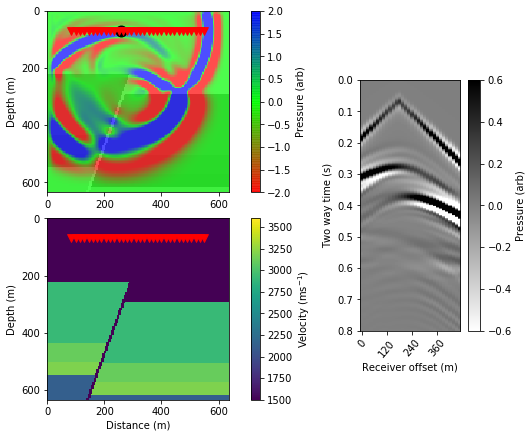

In [7]:
gain = np.arange(NSTEPS)**T_GAIN
gain = gain / np.median(gain)
gain = gain.reshape((1,NSTEPS))

plt.figure(figsize=(11,6))

# velocity & wavefield
plt.subplot2grid((6, 6), (0, 0), colspan=3, rowspan=3)
plt.imshow(velocity.T, alpha=0.6, cmap="gray_r", vmin=CLIM[0], vmax=CLIM[1])
plt.imshow(wavefields[135].T, aspect=1, cmap=plot_utils.rgb, alpha=0.7, vmin = -2, vmax=2)
cb = plt.colorbar()
cb.ax.set_ylabel('Pressure (arb)')
plt.scatter(source_i[0], source_i[1], color='black', s=120)
plt.scatter(receiver_is[:,0], receiver_is[:,1], color='red', marker='v', s=60)
plt.gca().set_anchor('C')# centre plot
plt.yticks(np.arange(0,NZ,40)[::-1], (DZ*np.arange(0,NZ,40)[::-1]).astype(np.int))
plt.xticks(np.arange(0,NX,40), (DX*np.arange(0,NX,40)).astype(np.int))
plt.ylabel("Depth (m)")
plt.xlim(0, NX-1)
plt.ylim(NZ-1, 0)

# velocity
plt.subplot2grid((6, 6), (3, 0), colspan=3, rowspan=3)
plt.imshow(velocity.T, vmin=CLIM[0], vmax=CLIM[1])
cb = plt.colorbar()
cb.ax.set_ylabel('Velocity ($\mathrm{ms}^{-1}$)')
plt.scatter(receiver_is[:,0], receiver_is[:,1], color='red', marker='v', s=60)
plt.gca().set_anchor('C')# centre plot
plt.yticks(np.arange(0,NZ,40)[::-1], (DZ*np.arange(0,NZ,40)[::-1]).astype(np.int))
plt.xticks(np.arange(0,NX,40), (DX*np.arange(0,NX,40)).astype(np.int))
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")
plt.xlim(0, NX-1)
plt.ylim(NZ-1, 0)

# gather
plt.subplot2grid((6, 6), (1, 3), rowspan=4, colspan=2)
plt.imshow((gain*gather).T, aspect=0.2, cmap="gray_r", vmin=-VLIM, vmax=VLIM)
plt.xlabel("Receiver offset (m)")
plt.xticks(np.arange(0,NREC,8), (DX*DELTARECi*np.arange(0,NREC,8)).astype(np.int))
plt.yticks(np.arange(0,NSTEPS,50)[::-1], (["%.1f"%(val) for val in DT*np.arange(0,NSTEPS,50)[::-1]]))
plt.ylabel("Two way time (s)")
plt.ylim(400,0)
plt.gca().set_anchor('C')# centre plot
plt.xticks(rotation=50)
cb = plt.colorbar()
cb.ax.set_ylabel('Pressure (arb)')

plt.subplots_adjust(left=0.2, right=0.9, bottom=0.1, top=1., hspace=0.6, wspace=1.)
plt.savefig("../report_plots/fig08.pdf", bbox_inches='tight', pad_inches=0.01, dpi=300)

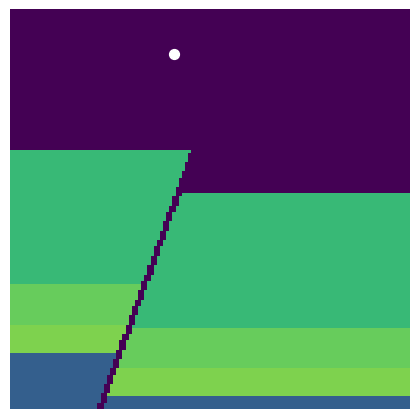

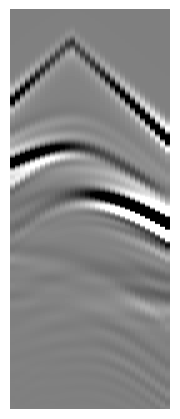

In [8]:
fig = plt.figure(frameon=False, figsize=(4,4), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(velocity.T, vmin=CLIM[0], vmax=CLIM[1])
plt.scatter(source_i[0], source_i[1], c="white", s=50)
with open('../report_plots/raw/velocity.png', 'wb') as outfile:
    fig.canvas.print_png(outfile)

fig = plt.figure(frameon=False, figsize=(4,4), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow((gain*gather).T, aspect=0.2, cmap="gray_r", vmin=-VLIM, vmax=VLIM)
plt.ylim(400,0)
with open('../report_plots/raw/gather_autoencoder.png', 'wb') as outfile:
    fig.canvas.print_png(outfile)